# Logistic Regression : Algerian Forest Fire Dataset

In [1]:
# importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statistics

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, recall_score,precision_score,f1_score

In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header =1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
df.shape

(246, 14)

In [4]:
df[df.isnull().any(axis = 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


OBSERVATIONS :                                                                                                               
    Here the index 122 seperates the data with 2 regions                                                                      
    1 : Bejaia Region Dataset                                                                                             
    2 : Sidi-Bel Abbes Region Dataset                                                                                       
    

In [5]:
# creating new column based on region 
df.loc[:122,'Region'] = 0
df.loc[123: ,'Region'] = 1

In [6]:
pd.set_option('display.max_rows', None)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
5,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire,0.0
6,07,06,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire,0.0
7,08,06,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire,0.0
8,09,06,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,0.0
9,10,06,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,0.0


In [7]:
df.shape

(246, 15)

In [8]:
# dropping na
df = df.dropna().reset_index(drop = True)
df.shape

(244, 15)

In [9]:
df.loc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1.0


In [10]:
# dropping index 122
df = df.drop(122).reset_index(drop= True)

In [11]:
df.shape

(243, 15)

In [12]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

OBSERVATIONS : Need to fix spaces in column names

In [13]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [14]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

OBSERVATIONS : we have to fix the spaces in our dependent feature

In [15]:
df['Classes'] = df['Classes'].str.strip()

In [16]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

OBSERVATIONS : Now we can encode Classes feature as 'not fire' : 0 , 'fire' : 1

In [17]:
# Encoding Classes feature
df['Classes'] = np.where(df['Classes'] == 'not fire',0,1)
df.head(3)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0


In [18]:
# Checking Dtypes of all features 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    object 
 1   month        243 non-null    object 
 2   year         243 non-null    object 
 3   Temperature  243 non-null    object 
 4   RH           243 non-null    object 
 5   Ws           243 non-null    object 
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    int32  
 14  Region       243 non-null    float64
dtypes: float64(1), int32(1), object(13)
memory usage: 27.7+ KB


OBSERVATIONS : We have to change the Dtype of all features accordingly

In [19]:
df[['day','month','year','Temperature','RH','Ws','Region']] = df[['day','month','year','Temperature','RH','Ws','Region']].astype(int)

In [20]:
for feature in df.columns:
    if df[feature].dtypes == 'O' :
        df[feature] = df[feature].astype(float)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    int32  
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(8)
memory usage: 21.0 KB


In [22]:
# dropping features that are not important for our analysis
df.drop(['day','month','year'],axis = 1,inplace=True)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [23]:
df.shape

(243, 12)

In [24]:
# Copy the data
cleaned_data = df.copy()

<AxesSubplot:xlabel='Region', ylabel='count'>

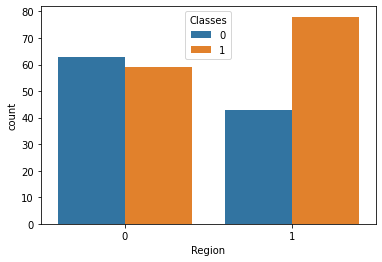

In [25]:
# Visualizing Amount of fire in both the regions
sns.countplot(x = 'Region',data = df,hue = 'Classes')

OBSERVATIONS :Sidi-Bel Abbes Region has More fire than Bejaia Region

<AxesSubplot:xlabel='Temperature', ylabel='count'>

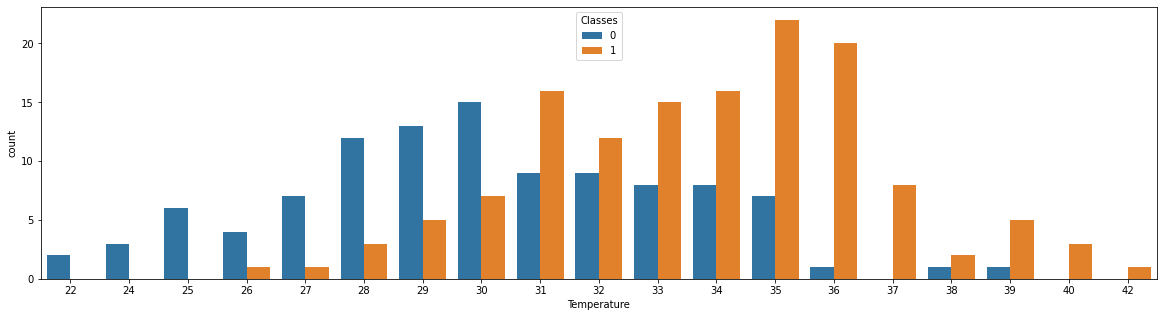

In [26]:
# Visualizing whether the temperature could also be a reason for fire or not
plt.figure(figsize=(20,5))
sns.countplot(x = 'Temperature',data = df,hue = 'Classes')

OBSERVATIONS : It seems that the fire increased when the temperature raised

<AxesSubplot:xlabel='Temperature', ylabel='count'>

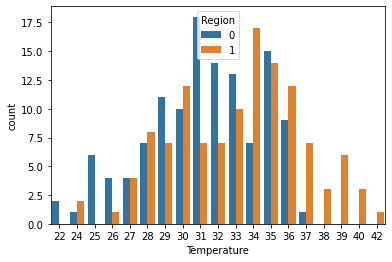

In [27]:
# Visalizing temperature in both the regions
sns.countplot(x = 'Temperature',data = df,hue = 'Region')

OBSERVATIONS : Sidi-Bel Abbes Region has high temperature than Bejaia Region

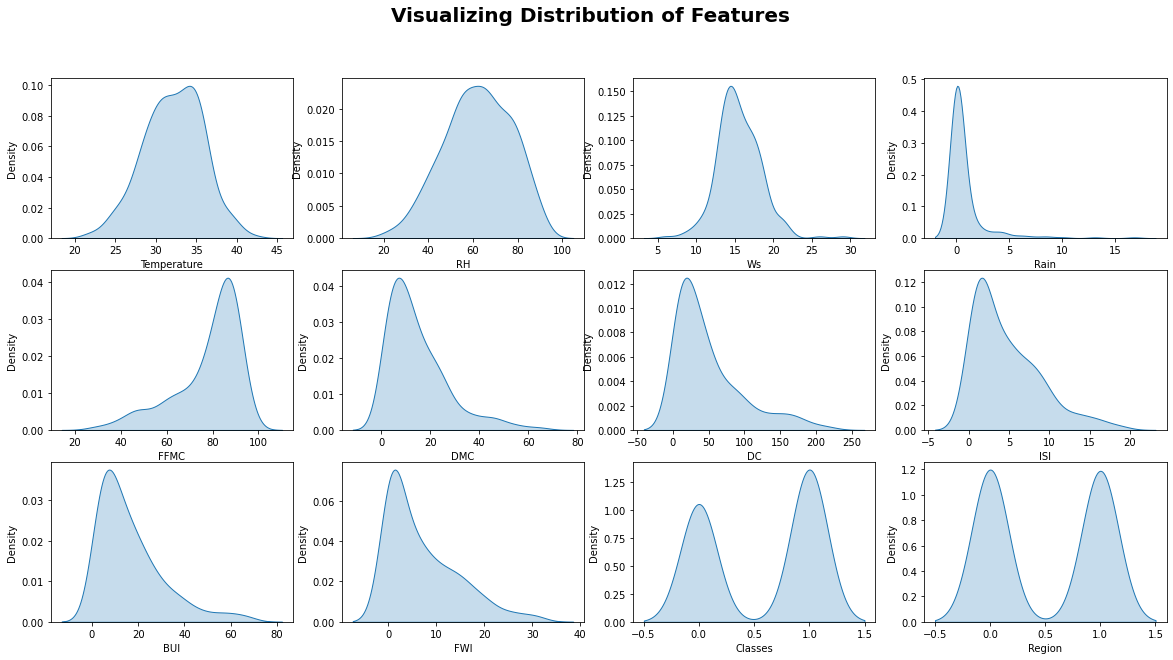

In [28]:
# Visualizing the Distribution

plt.figure(figsize=(20,10))
plt.suptitle('Visualizing Distribution of Features',fontsize = 20, fontweight = 'bold')

for i in range(0,len(df.columns)):
    plt.subplot(3,4,i+1)
    sns.kdeplot(x = df[df.columns[i]], shade=True)

OBSERVATIONS :                                                                                                
    1) Rain, DMC, DC, ISI, BUI, FWI Features are Right Skewed                                                                
    2) FFMC is Left skewed

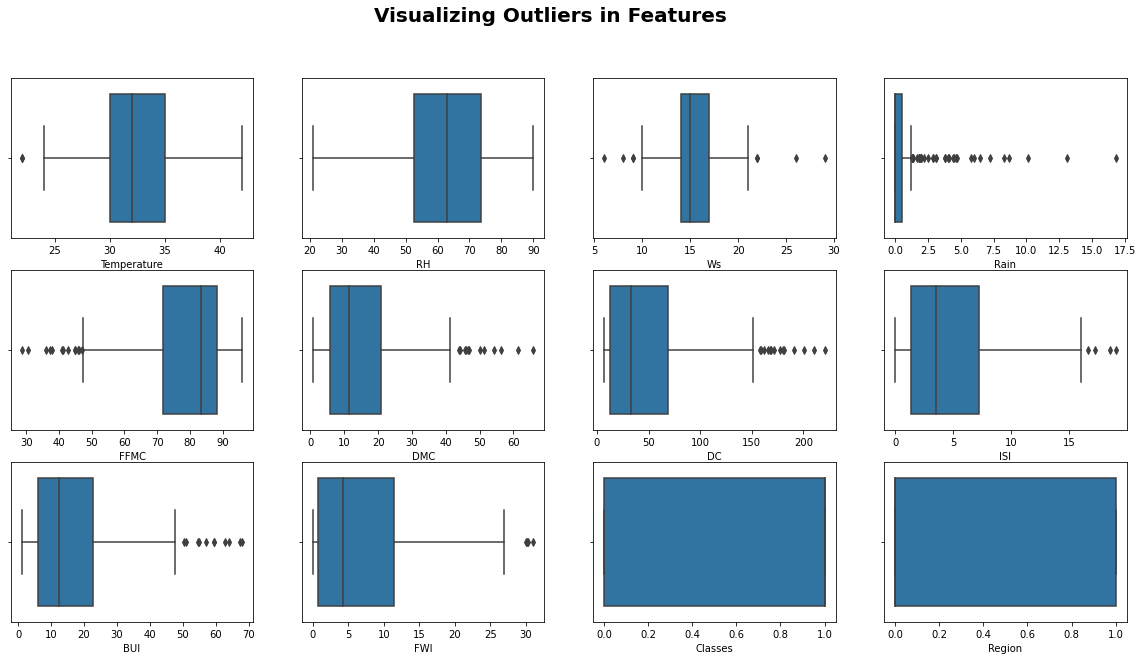

In [29]:
# Visualizing Outliers

plt.figure(figsize=(20,10))
plt.suptitle('Visualizing Outliers in Features',fontsize = 20, fontweight = 'bold')

for i in range(0,len(df.columns)):
    plt.subplot(3,4,i+1)
    sns.boxplot(x = df[df.columns[i]])

OBSERVATIONS : We can see clearly that most of the features have Outliers

In [30]:
X = df.drop('Classes',axis = 1)
y = df['Classes']

In [31]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [32]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Classes, dtype: int32

In [33]:
# Splitting Data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [34]:
X_train.shape, X_test.shape

((170, 11), (73, 11))

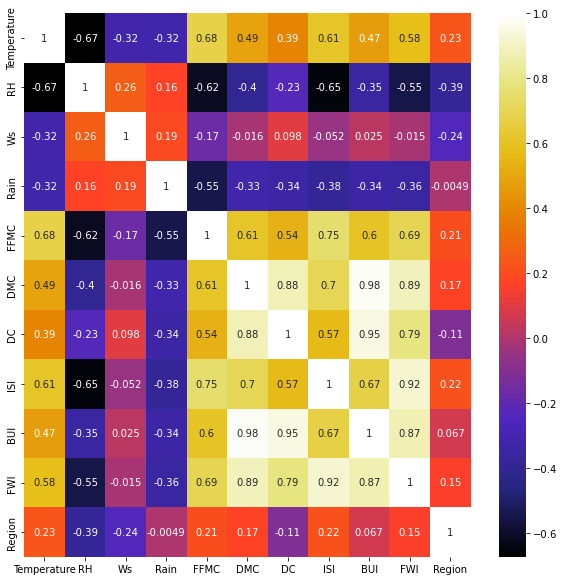

In [35]:
# checking Correlation of features

plt.figure(figsize=(10,10))
cor = X_train.corr()
sns.heatmap(cor,annot=True, cmap=plt.cm.CMRmap)
plt.show()

OBSERVATIONS : It seems that there are some independent features that are correlated with eachother. So we need 
               to find those features and drop to avoid multi-Collinearity

In [36]:
# Creating def to find Correlated features
def correlation(df,threshold):
    col_cor = set()
    cor_matrix = df.corr()
    for i in range(len(cor_matrix.columns)):
        for j in range(i):
            if (cor_matrix.iloc[i,j])>threshold :
                colname = cor_matrix.columns[i]
                col_cor.add(colname)
                
    return col_cor

In [37]:
corr_features = correlation(X_train,0.8)
len(set(corr_features))

3

In [38]:
corr_features

{'BUI', 'DC', 'FWI'}

OBSERVATIONS : So there are 3 Correlated features that needs to be dropped

In [39]:
X_train.drop(corr_features, axis = 1,inplace=True)

In [40]:
X_test.drop(corr_features, axis = 1,inplace=True)

OBSERVATIONS : We have dropped 'BUI', 'DC', 'FWI' features from X_train and X_test

# Feature Transformation

In [41]:
# Apply Yeo-Johnson transform
pt = PowerTransformer()
X_train_trans= pt.fit_transform(X_train)
X_test_trans= pt.transform(X_test)

In [42]:
X_train_trans = pd.DataFrame(X_train_trans, columns=X_train.columns)

In [43]:
X_train_trans

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Region
0,-0.904670,0.705710,0.575180,-0.244693,-1.020072,-1.675427,-0.838222,-1.011835
1,-0.336711,1.151964,-0.149139,-0.782347,0.481566,1.194330,0.340133,-1.011835
2,-0.621984,1.002024,1.921136,1.662797,-1.494794,-1.675427,-1.012792,-1.011835
3,1.126532,-0.083287,0.217890,-0.782347,0.785566,0.486528,0.825195,0.988304
4,-0.904670,0.779336,-0.149139,1.431371,-1.456875,-0.909752,-1.211954,0.988304
5,0.534067,0.057222,0.217890,-0.782347,1.003322,1.984657,0.878691,-1.011835
6,-1.184706,1.227370,0.575180,1.804860,-1.757596,-1.317771,-1.531301,-1.011835
7,-0.621984,1.840784,-0.526808,-0.782347,0.148447,-0.567068,-0.152472,0.988304
8,-0.336711,0.270490,0.575180,-0.244693,-0.197856,-0.504882,-0.373767,-1.011835
9,1.126532,-1.026639,-0.916168,-0.782347,1.131331,0.863913,1.106992,-1.011835


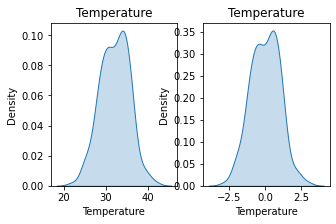

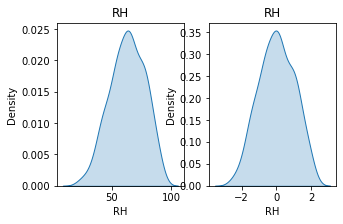

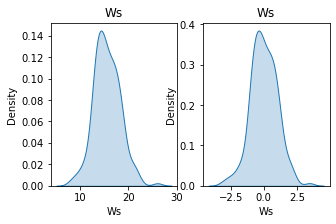

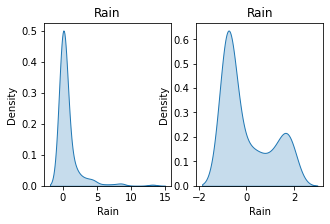

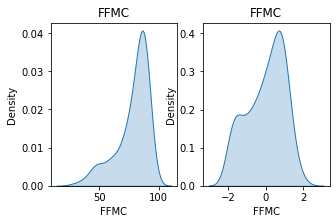

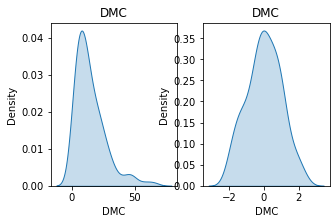

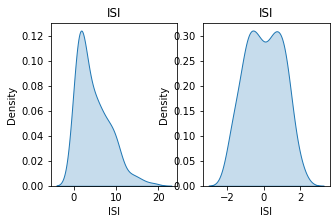

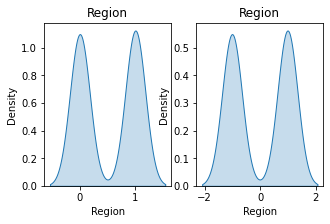

In [44]:
# Visualizing the tranformed distribution

for feature in X_train_trans.columns:
    plt.figure(figsize=(5,3))
    plt.subplot(1,2,1)
    sns.kdeplot(x = X_train[feature], shade=True)
    plt.title(feature)
    
    plt.subplot(1,2,2)
    sns.kdeplot(X_train_trans[feature], shade=True)
    plt.title(feature)

    plt.show()
    

# Model Building - Logistic Regression

In [45]:
Logistic_Reg = LogisticRegression()
Logistic_Reg.fit(X_train_trans,y_train)

LogisticRegression()

In [46]:
print('Intercept is :',Logistic_Reg.intercept_)
print('Coefficient is :',Logistic_Reg.coef_)

Intercept is : [0.86929545]
Coefficient is : [[ 0.23613619 -0.02061805 -0.09259353 -0.37404206  2.34754414  0.39410345
   2.45657734 -0.00481902]]


In [47]:
y_pred = Logistic_Reg.predict(X_test_trans)
y_pred

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1])

In [48]:
print("Training Score:",Logistic_Reg.score(X_train_trans, y_train))
print("Test Score:",Logistic_Reg.score(X_test_trans,y_test))

Training Score: 0.9647058823529412
Test Score: 0.9726027397260274


# Accuracy

In [49]:
print("Accuracy of Logistic Regression",accuracy_score(y_pred,y_test))

Accuracy of Logistic Regression 0.9726027397260274


# confusion_matrix

In [50]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1
0,32,2
1,0,39


# precision

In [51]:
print(precision_score(y_test,y_pred,average=None))

[1.         0.95121951]


# recall

In [52]:
print(recall_score(y_test,y_pred,average=None))

[0.94117647 1.        ]


# f1_score

In [53]:
print(f1_score(y_test,y_pred,average=None))

[0.96969697 0.975     ]
